In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12 or int(torch.__version__.split(".")[0]) == 2, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 2.9.0
torchvision version: 0.24.0


In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo. Installing it.")
    !pip install -q torchinfo
    from trochinfo import summary

In [3]:
# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    import git 
    repo = git.Repo.clone_from('git@github.com:mrdbourke/pytorch-deep-learning.git',
                           'D:\Document\GitHub\Vit_deployment\main',
                           branch='main')
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
/var/folders/tt/1ssq614n7wz7xsxzptd0956h0000gn/T/ipykernel_98588/1201883274.py:8: SyntaxWarning: invalid escape sequence '\D'
  'D:\Document\GitHub\Vit_deployment\main',
/Users/utilisateur/Documents/GitHub/VIT_model/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Get device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 1 Get the data

In [5]:
# Create image size
IMG_SIZE = 224

# Create transform pipeline manualy
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE,IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms : {manual_transforms}")

Manually created transforms : Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [6]:
train_data = torchvision.datasets.CIFAR100(
    root= "data",
    train = True,
    download=True,
    transform = manual_transforms,
    target_transform=None
)

test_data = torchvision.datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=manual_transforms,
    target_transform=None
)

In [7]:
print(f"Train data :\n{train_data}\nTest data: \n{test_data}")

Train data :
Dataset CIFAR100
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data: 
Dataset CIFAR100
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [8]:
# Get class names as a list
class_names = train_data.classes
class_names

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [9]:
# Get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'apple': 0,
 'aquarium_fish': 1,
 'baby': 2,
 'bear': 3,
 'beaver': 4,
 'bed': 5,
 'bee': 6,
 'beetle': 7,
 'bicycle': 8,
 'bottle': 9,
 'bowl': 10,
 'boy': 11,
 'bridge': 12,
 'bus': 13,
 'butterfly': 14,
 'camel': 15,
 'can': 16,
 'castle': 17,
 'caterpillar': 18,
 'cattle': 19,
 'chair': 20,
 'chimpanzee': 21,
 'clock': 22,
 'cloud': 23,
 'cockroach': 24,
 'couch': 25,
 'crab': 26,
 'crocodile': 27,
 'cup': 28,
 'dinosaur': 29,
 'dolphin': 30,
 'elephant': 31,
 'flatfish': 32,
 'forest': 33,
 'fox': 34,
 'girl': 35,
 'hamster': 36,
 'house': 37,
 'kangaroo': 38,
 'keyboard': 39,
 'lamp': 40,
 'lawn_mower': 41,
 'leopard': 42,
 'lion': 43,
 'lizard': 44,
 'lobster': 45,
 'man': 46,
 'maple_tree': 47,
 'motorcycle': 48,
 'mountain': 49,
 'mouse': 50,
 'mushroom': 51,
 'oak_tree': 52,
 'orange': 53,
 'orchid': 54,
 'otter': 55,
 'palm_tree': 56,
 'pear': 57,
 'pickup_truck': 58,
 'pine_tree': 59,
 'plain': 60,
 'plate': 61,
 'poppy': 62,
 'porcupine': 63,
 'possum': 64,
 'rabbit': 65,

In [10]:
# Check the length
len(train_data),len(test_data)

(50000, 10000)

In [11]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7137, 0.7137, 0.7137],
         [1.0000, 1.0000, 1.0000,  ..., 0.7137, 0.7137, 0.7137],
         [1.0000, 1.0000, 1.0000,  ..., 0.7137, 0.7137, 0.7137],
         ...,
         [0.3412, 0.3412, 0.3412,  ..., 0.5412, 0.5412, 0.5412],
         [0.3412, 0.3412, 0.3412,  ..., 0.5412, 0.5412, 0.5412],
         [0.3412, 0.3412, 0.3412,  ..., 0.5412, 0.5412, 0.5412]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.7608, 0.7608, 0.7608],
         [1.0000, 1.0000, 1.0000,  ..., 0.7608, 0.7608, 0.7608],
         [1.0000, 1.0000, 1.0000,  ..., 0.7608, 0.7608, 0.7608],
         ...,
         [0.4784, 0.4784, 0.4784,  ..., 0.6784, 0.6784, 0.6784],
         [0.4784, 0.4784, 0.4784,  ..., 0.6784, 0.6784, 0.6784],
         [0.4784, 0.4784, 0.4784,  ..., 0.6784, 0.6784, 0.6784]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.6549, 0.6549, 0.6549],
         [1.0000, 1.0000, 1.0000,  ..., 0.6549, 0.6549, 0.6549],
         [1.0000, 1.0000, 1.0000,  ..., 0.65

Original shape: torch.Size([3, 224, 224]) -> [color_channels, heigth, width]
Image permute shape: torch.Size([224, 224, 3]) -> [heigth, width, color_channels]


Text(0.5, 1.0, 'cattle')

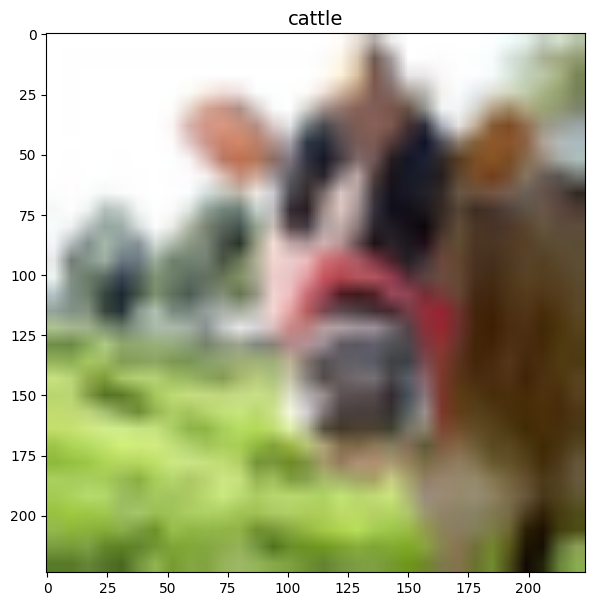

In [12]:
# Plot a single image tensor using matplotlib

# Rearange the order of dimensions
img_permute = img.permute(1,2,0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, heigth, width]")
print(f"Image permute shape: {img_permute.shape} -> [heigth, width, color_channels]")

# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img.permute(1,2,0))
plt.axis = False
plt.title(class_names[label], fontsize = 14)

# 2 Create dataloaders

## 2.1 Turn images into dataloaders

In [120]:
from torch.utils.data import DataLoader
import os

# Set the batch size
BATCH_SIZE = 32

cpu_num = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = cpu_num,
                              shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers = cpu_num,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x17788df20>,
 <torch.utils.data.dataloader.DataLoader at 0x17788e030>)

In [80]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(18))

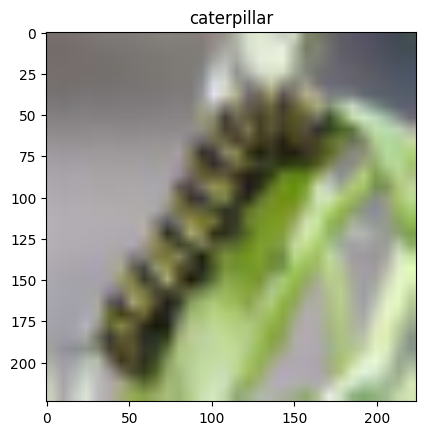

In [81]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis = False

# 3.0 Replicating the ViT paper

## 3.1 Split data into patches and creating the class position and patch embedding

Here we are working on Eq.1 : 

$z_{0} = [X_{class}; x_{p}^{1}E;x_{p}^{2}E; ... ; x_{p}^{N}E]+ E_{pos}$

In [82]:
# Create example values
height = 224 # H 
width  = 224  # W
color_channels = 3 # C
patch_size = 16 # P

# Calculate N (number of patches)
number_of_patches = int((height * width) / patch_size**2)
print(f"Number of patches (N) with image height (H={height}), width (W={width}) and patch size (P={patch_size}): {number_of_patches}")

# Input shape
embedding_layer_input_shape = (height,width,color_channels)

# Output shape
embedding_layer_output_shape = (number_of_patches, patch_size**2 * color_channels)

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output shape (single 2D image flattened into patches): {embedding_layer_output_shape}")

Number of patches (N) with image height (H=224), width (W=224) and patch size (P=16): 196
Input shape (single 2D image): (224, 224, 3)
Output shape (single 2D image flattened into patches): (196, 768)


### 3.1.1 Turning image into patches

Here we are working on the second part of the equation : 

$ x_{p}^{1}E;x_{p}^{2}E; ... ; x_{p}^{N}E$

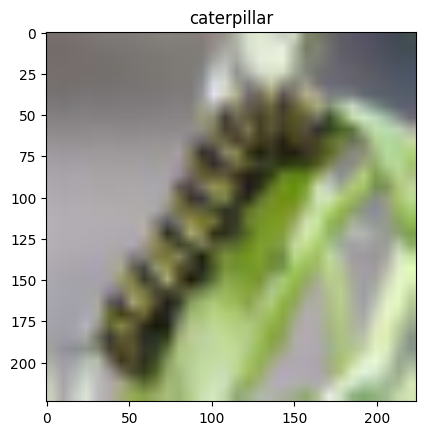

In [83]:
# View single image
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis = False

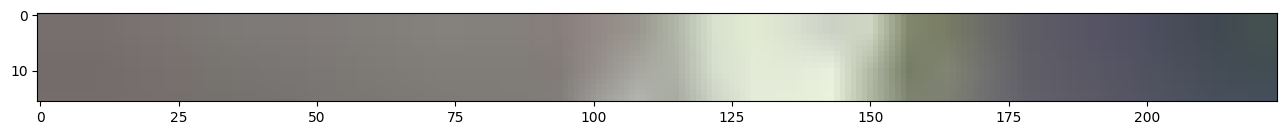

In [84]:
# Change image shape to be compatible with matplotlib
image_permuted = image.permute(1,2,0)

# Index to plot the top row of patched pixels
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :,: :]);

Number of patches is 14.0
Number of patches per row: 14.0
Patch size: 16 pixels x 16 pixels


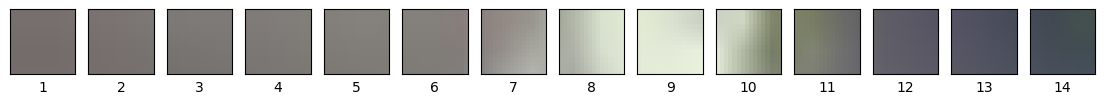

In [85]:
# Setup hyperparameters and make sure img_size patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
print(f'Number of patches is {num_patches}')

assert img_size % patch_size == 0,"Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches}\nPatch size: {patch_size} pixels x {patch_size} pixels")


# Create a series of subplots
fig, axs = plt.subplots(nrows = 1,
                       ncols = img_size // patch_size,
                       figsize = (num_patches, num_patches),
                       sharex = True,
                       sharey = True)

# Iterate through number of patches in the top row
for i, patch in enumerate(range(0,img_size, patch_size)):
    axs[i].imshow(image_permuted[:patch_size,patch:patch+patch_size,:]); # keep height index constant, alter the width index
    axs[i].set_xlabel(i+1) # set the label
    axs[i].set_xticks([])
    axs[i].set_yticks([])

Number of patches per row: 14.0        
Number of patches per column: 14.0        
Total patches: 196.0        
Patch size: 16 pixels x 16 pixels


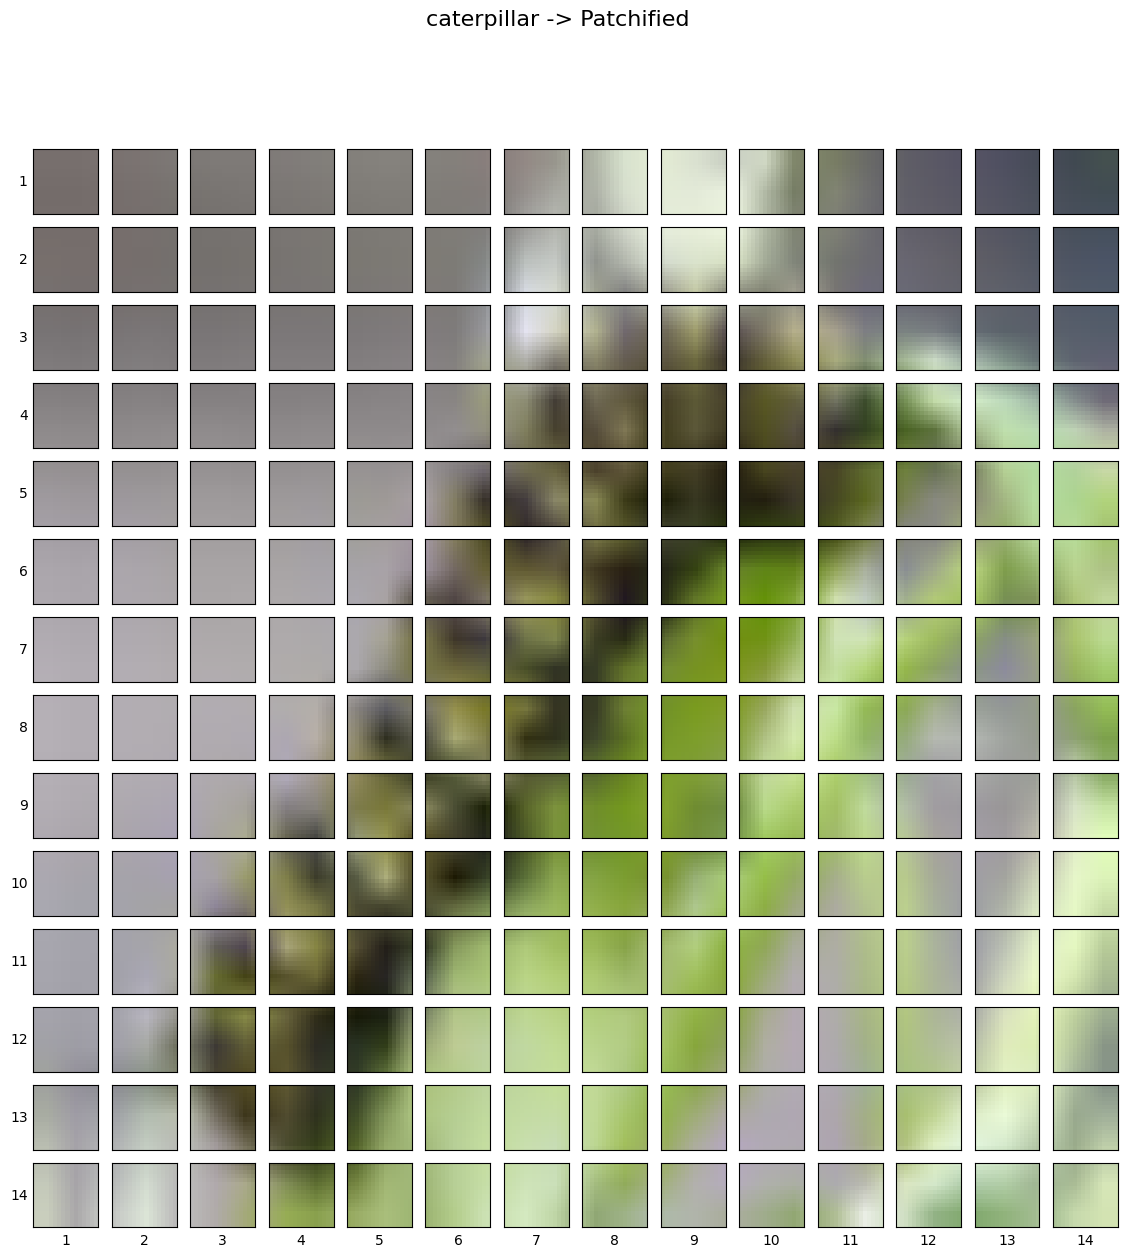

In [86]:
# Setup hyperparameters and make sure img_size and patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches}\
        \nNumber of patches per column: {num_patches}\
        \nTotal patches: {num_patches*num_patches}\
        \nPatch size: {patch_size} pixels x {patch_size} pixels")

# Create a series of subplots
fig, axs = plt.subplots(nrows=img_size // patch_size, # need int not float
                        ncols=img_size // patch_size,
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

# Loop through height and width of image
for i, patch_height in enumerate(range(0, img_size, patch_size)): # iterate through height
    for j, patch_width in enumerate(range(0, img_size, patch_size)): # iterate through width

        # Plot the permuted image patch (image_permuted -> (Height, Width, Color Channels))
        axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size, # iterate through height
                                        patch_width:patch_width+patch_size, # iterate through width
                                        :]) # get all color channels

        # Set up label information, remove the ticks for clarity and set labels to outside
        axs[i, j].set_ylabel(i+1,
                             rotation="horizontal",
                             horizontalalignment="right",
                             verticalalignment="center")
        axs[i, j].set_xlabel(j+1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

# Set a super title
fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=16)
plt.show()

In [87]:
from torch import nn

# Set the patch size 
patch_size = 16

# Create the Conv2d layer with hyperparameters from the ViT paper
conv2d = nn.Conv2d(in_channels=3, # number of color channels
                   out_channels=768, # Embedding size
                   stride = patch_size, 
                   kernel_size= patch_size,
                   padding = 0)

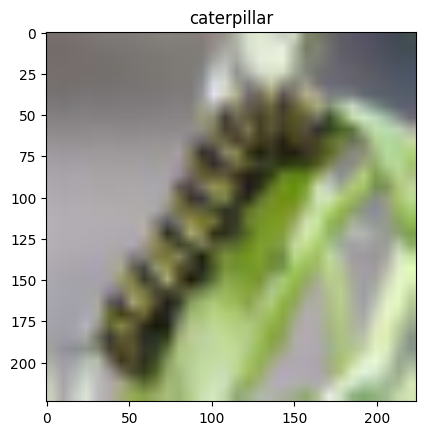

In [88]:
# View single image
plt.imshow(image.permute(1,2,0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis = False

In [89]:
# Pass the image through the convolutional layer
image_out_of_conv = conv2d(image.unsqueeze(0))
print(image_out_of_conv.shape)

torch.Size([1, 768, 14, 14])


Showing random convolutional feature maps from indexes: [70, 250, 72, 591, 751]


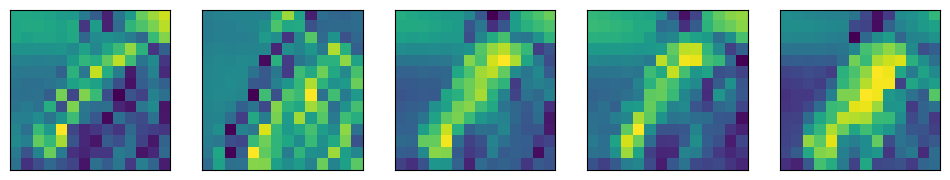

In [90]:
# Plot 5 random convolutional feature maps
import random
random_indexes = random.sample(range(0,758), k = 5) # Pick 5 numbers between 0 and the embeddging size
print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# Create plot
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (12,12))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
    image_conv_feature_map = image_out_of_conv[:, idx, :, :]
    axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
    axs[i].set(xticklabels=[], yticklabels=[],xticks=[],yticks=[]);

In [91]:
# Get a single feature map in tensor form
single_feature_map = image_out_of_conv[:, 0, :, :]
single_feature_map, single_feature_map.requires_grad

(tensor([[[0.1818, 0.1875, 0.1887, 0.1960, 0.2010, 0.2033, 0.2714, 0.3677,
           0.3587, 0.1817, 0.1594, 0.1563, 0.1376, 0.1266],
          [0.1803, 0.1841, 0.1850, 0.1899, 0.1951, 0.2197, 0.3181, 0.3260,
           0.3125, 0.1841, 0.1771, 0.1665, 0.1542, 0.1486],
          [0.1954, 0.1990, 0.2021, 0.2031, 0.2080, 0.2553, 0.2380, 0.1550,
           0.1075, 0.1714, 0.1957, 0.2310, 0.1926, 0.1668],
          [0.2273, 0.2291, 0.2308, 0.2300, 0.2348, 0.2273, 0.0716, 0.0623,
           0.0445, 0.1080, 0.0633, 0.2114, 0.2287, 0.2279],
          [0.2639, 0.2651, 0.2616, 0.2629, 0.2608, 0.1433, 0.0962, 0.0981,
           0.0045, 0.0484, 0.0870, 0.1832, 0.2606, 0.2265],
          [0.2915, 0.2871, 0.2826, 0.2845, 0.2500, 0.0939, 0.1297, 0.0364,
           0.0336, 0.0461, 0.2575, 0.2247, 0.2075, 0.1816],
          [0.3037, 0.3002, 0.2980, 0.2928, 0.1796, 0.1230, 0.0696, 0.0389,
           0.0738, 0.1600, 0.2122, 0.1709, 0.1938, 0.2330],
          [0.3076, 0.3047, 0.3006, 0.2659, 0.1396, 0.07

The gradient of this feature map will be updated by gradient descent during training

## 3.2 Flatening the patch embedding with `torch.nn.Flatten()`

In [92]:
# Checking the current tensor shape
print(f"Current tensor shape: {image_out_of_conv.shape} -> [batch_size, embedding_dim, feature_map_height, feature_map_width]")

Current tensor shape: torch.Size([1, 768, 14, 14]) -> [batch_size, embedding_dim, feature_map_height, feature_map_width]


We want to flatten only the spatial dimensions of our tensor so `feature_map_height` and `feature_map_width`. To do so we create a flatten layer

In [93]:
# Create a flatten layer
flatten = nn.Flatten(start_dim=2, # flatten feature_map_height (dimension 2)
                     end_dim = 3) # flatten feature_map_width (dimension 3)

Wrapping it all together : 

Original image shape: torch.Size([3, 224, 224])
Image feature map shape : torch.Size([1, 768, 14, 14])
Flattened iage feature map shape : torch.Size([1, 768, 196])


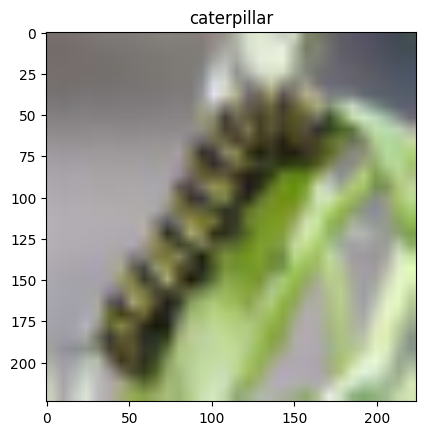

In [94]:
# 1. View a single image
plt.imshow(image.permute(1,2,0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis = False ;
print(f"Original image shape: {image.shape}")


# 2. Turn image into feature maps
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension to avoid shape errors
print(f"Image feature map shape : {image_out_of_conv.shape}")

# 3. Flatten the feature maps
image_out_of_conv_flatten = flatten(image_out_of_conv)
print(f"Flattened iage feature map shape : {image_out_of_conv_flatten.shape}")

We are very close of our desired output shape : (196, 768). We will need to rearrange the dimensions

In [95]:
# Get flattened image patch embeddings in right shape
image_out_of_conv_flattened_reshaped = image_out_of_conv_flatten.permute(0,2,1)
print(f"Flattened iage feature map shape : {image_out_of_conv_flattened_reshaped.shape}")

Flattened iage feature map shape : torch.Size([1, 196, 768])


Visualizing the feature map

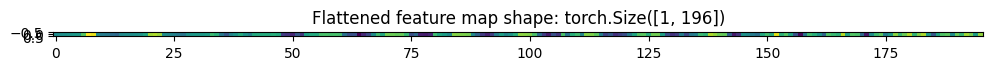

In [96]:
# Get a single flattened feature map
single_flattened_feature_map = image_out_of_conv_flattened_reshaped[:, :, 0] # index: (batch_size, number_of_patches, embedding_dimension)

# Plot the flattened feature map visually
plt.figure(figsize=(12, 12))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.axis = False

In [97]:
# see the flattened feature map as a tensor
single_flattened_feature_map,single_flattened_feature_map.requires_grad, single_flattened_feature_map.shape

(tensor([[0.1818, 0.1875, 0.1887, 0.1960, 0.2010, 0.2033, 0.2714, 0.3677, 0.3587,
          0.1817, 0.1594, 0.1563, 0.1376, 0.1266, 0.1803, 0.1841, 0.1850, 0.1899,
          0.1951, 0.2197, 0.3181, 0.3260, 0.3125, 0.1841, 0.1771, 0.1665, 0.1542,
          0.1486, 0.1954, 0.1990, 0.2021, 0.2031, 0.2080, 0.2553, 0.2380, 0.1550,
          0.1075, 0.1714, 0.1957, 0.2310, 0.1926, 0.1668, 0.2273, 0.2291, 0.2308,
          0.2300, 0.2348, 0.2273, 0.0716, 0.0623, 0.0445, 0.1080, 0.0633, 0.2114,
          0.2287, 0.2279, 0.2639, 0.2651, 0.2616, 0.2629, 0.2608, 0.1433, 0.0962,
          0.0981, 0.0045, 0.0484, 0.0870, 0.1832, 0.2606, 0.2265, 0.2915, 0.2871,
          0.2826, 0.2845, 0.2500, 0.0939, 0.1297, 0.0364, 0.0336, 0.0461, 0.2575,
          0.2247, 0.2075, 0.1816, 0.3037, 0.3002, 0.2980, 0.2928, 0.1796, 0.1230,
          0.0696, 0.0389, 0.0738, 0.1600, 0.2122, 0.1709, 0.1938, 0.2330, 0.3076,
          0.3047, 0.3006, 0.2659, 0.1396, 0.0725, 0.0321, 0.0981, 0.0633, 0.2657,
          0.1485

This is the lienar projection of flattened patches, a learnable embedding vector

## 3.5 Turning the ViT patch embedding layer into a PyTorch module

In [98]:
class PatchEmbedding(nn.Module):
        """Turns a 2D input image into a 1D sequence learnable embedding vector.
    Args:
        in_channels (int): Number of color channels for the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
    """
        def __init__(self,
                    in_channels:int = 3,
                    patch_size:int = 16,
                    embedding_dim:int = 768):
            super().__init__()
            
            # 3. Create a layer to turn an image into patches
            self.patcher = nn.Conv2d(in_channels=in_channels,
                                     out_channels = embedding_dim,
                                     kernel_size = patch_size,
                                     stride = patch_size,
                                     padding = 0)
            
            # 4. Create a layer to flatten the patch feature map into a single dimension
            self.flatten = nn.Flatten(start_dim = 2, # only flatten the feature map dimension ito a single vector
                                      end_dim = 3)
            
        # 5. Define the forward method
        def forward(self, x):
            # Create assertion to check that inputs are the correct shape
            image_resolution = x.shape[-1]
            assert image_resolution % patch_size ==0, f"Input size must be divisible by patch size, image shape:  {image_resolution}, patch size: {patch_size}"
        
            # Perform the forward pass
            x_patched = self.patcher(x)
            x_flattened = self.flatten(x_patched)
            # 6. Make sure the output shape has the right order
            return x_flattened.permute(0,2,1) # adjust so the embeddings is ont the fial dimension [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]

In [99]:
set_seeds()

# Create an instance of patch embedding layer
patchify = PatchEmbedding(in_channels=3,
                          patch_size=16,
                          embedding_dim=768)

# Pass a single image trough
print(f"Input image shape {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0)) # add an extra batch dimension
print(f"Output patch embedding shape : {patch_embedded_image.shape}")

Input image shape torch.Size([1, 3, 224, 224])
Output patch embedding shape : torch.Size([1, 196, 768])


Get a summary of the PatchEmbedding layer

In [100]:
# Create radom input size
random_input_image = (1,3,224,224)
random_input_image_error = (1,3,250,250) # This will trigger an error

summary(PatchEmbedding(),
        input_size = random_input_image,
        col_names = ["input_size", "output_size", "num_params", "trainable"],
        col_width = 20,
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
PatchEmbedding (PatchEmbedding)          [1, 3, 224, 224]     [1, 196, 768]        --                   True
├─Conv2d (patcher)                       [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Flatten (flatten)                      [1, 768, 14, 14]     [1, 768, 196]        --                   --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

## 3.6 Creating the class token embeddings

Here we are working on the first part of Eq.1 : $x_{class}$

In [101]:
# View the patch embedding and patch embedding shape
print(patch_embedded_image)
print(f"PAtch embedding shape : {patch_embedded_image.shape} --> [bact_size, number of patches, emebedded dimension]")

tensor([[[-0.4730,  0.1135, -0.1320,  ...,  0.3462, -0.2190,  0.1627],
         [-0.4869,  0.1239, -0.1329,  ...,  0.3581, -0.2261,  0.1655],
         [-0.5034,  0.1268, -0.1358,  ...,  0.3724, -0.2327,  0.1689],
         ...,
         [-0.7979,  0.2540, -0.1930,  ...,  0.5603, -0.3643,  0.2883],
         [-0.7174,  0.1871, -0.1547,  ...,  0.5792, -0.3786,  0.2393],
         [-0.8264,  0.2610, -0.2450,  ...,  0.6370, -0.3583,  0.2343]]],
       grad_fn=<PermuteBackward0>)
PAtch embedding shape : torch.Size([1, 196, 768]) --> [bact_size, number of patches, emebedded dimension]


We are gonna create a **learnable embedding** in the shape of the `embedding_dimension` and add it to the `number_of_patched` dimension

In [102]:
# Get the batch size and embedding dimension
batch_size = patch_embedded_image.shape[0]
embedding_dimension = patch_embedded_image.shape[-1]

# Create the class token embedding as a learnable parameter that shares the same size as the embedding dimension (D)
class_token = nn.Parameter(torch.ones(batch_size,1, embedding_dimension), # [ batch_size, number_of_tokens, embedding_dimension]
                           requires_grad = True) # make sure the emebdding is learnable

#Show the first 10 examples of the class_token
print(class_token[:,:,:10])

# Print the class_token shape
print(f"Class token shape: {class_token.shape} -> [batch_size, number_of_tokens, embedding_dimensions]")

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Class token shape: torch.Size([1, 1, 768]) -> [batch_size, number_of_tokens, embedding_dimensions]


In [103]:
# add the class token embedding to the front of the patch embedding
patch_embedded_image_with_class_embedding = torch.cat((class_token,patch_embedded_image),
                                                      dim = 1) # concat on first dimension

# print the sequence of patch embeddings with the prepended class token embedding
print(patch_embedded_image_with_class_embedding)
print(f"Sequence of patch embeddings with class token prepended shape: {patch_embedded_image_with_class_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.4730,  0.1135, -0.1320,  ...,  0.3462, -0.2190,  0.1627],
         [-0.4869,  0.1239, -0.1329,  ...,  0.3581, -0.2261,  0.1655],
         ...,
         [-0.7979,  0.2540, -0.1930,  ...,  0.5603, -0.3643,  0.2883],
         [-0.7174,  0.1871, -0.1547,  ...,  0.5792, -0.3786,  0.2393],
         [-0.8264,  0.2610, -0.2450,  ...,  0.6370, -0.3583,  0.2343]]],
       grad_fn=<CatBackward0>)
Sequence of patch embeddings with class token prepended shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


## 4.7 Creating the position embedding

In [104]:
# View the sequence of patch embeddings with the prepended class embedding
patch_embedded_image_with_class_embedding, patch_embedded_image_with_class_embedding.shape

(tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [-0.4730,  0.1135, -0.1320,  ...,  0.3462, -0.2190,  0.1627],
          [-0.4869,  0.1239, -0.1329,  ...,  0.3581, -0.2261,  0.1655],
          ...,
          [-0.7979,  0.2540, -0.1930,  ...,  0.5603, -0.3643,  0.2883],
          [-0.7174,  0.1871, -0.1547,  ...,  0.5792, -0.3786,  0.2393],
          [-0.8264,  0.2610, -0.2450,  ...,  0.6370, -0.3583,  0.2343]]],
        grad_fn=<CatBackward0>),
 torch.Size([1, 197, 768]))

In [105]:
# Calculate N (number of patches)
number_of_patches = int((height * width) / patch_size**2)

# get embedding dimension
embedding_dimension = patch_embedded_image_with_class_embedding.shape[2]

# Create the learnable 1D position embedding
position_embedding = nn.Parameter(torch.ones(1,number_of_patches+1,embedding_dimension),
                                  requires_grad = True)

# Show the first 10 sequences and 10 position embedding values and check the shape of the position embedding
print(position_embedding[:,:10,:10])
print(f"Position embedding shape: {position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Position embedding shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


In [106]:
# Add the position embedding to the patch and class token embedding
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding
print(patch_and_position_embedding)
print(f"Patch embeddings, class token prepended and positional embeddings added shape: {patch_and_position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.5270, 1.1135, 0.8680,  ..., 1.3462, 0.7810, 1.1627],
         [0.5131, 1.1239, 0.8671,  ..., 1.3581, 0.7739, 1.1655],
         ...,
         [0.2021, 1.2540, 0.8070,  ..., 1.5603, 0.6357, 1.2883],
         [0.2826, 1.1871, 0.8453,  ..., 1.5792, 0.6214, 1.2393],
         [0.1736, 1.2610, 0.7550,  ..., 1.6370, 0.6417, 1.2343]]],
       grad_fn=<AddBackward0>)
Patch embeddings, class token prepended and positional embeddings added shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


## 4.8 Putting it all together

$$ \begin{aligned} \mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D} \end{aligned} $$

In [107]:
set_seeds()

# 1. Set patch size
patch_size = 16

# 2. Print shape of original image tensor and get the image dimensions
print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]

# 3. Get image tnesor and add batch dimension
x = image.unsqueeze(0)
print(f'Input image with batch dimension shape: {x.shape}')

# 4. Create patch embedding layer
patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size = patch_size,
                                       embedding_dim= 768)

# 5. Pass image through patch embedding layer
patch_embedding = patch_embedding_layer(x)
print(f"Patching embedding shape: {patch_embedding.shape}")

# 6. Create classetoken embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token == nn.Parameter(torch.ones(batch_size,1,embedding_dimension),
                            requires_grad = True)
print(f"Class token embedding shape: {class_token.shape}")

# 7. Prepend class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token, patch_embedding),dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")

# 8. Create position embedding
number_of_patches = int((height*width) / patch_size **2)
position_embedding = nn.Parameter(torch.ones(1, number_of_patches+1, embedding_dimension),
                                  requires_grad=True) # make sure it's learnable

# 9. Add position embedding to patch embedding with class token
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")


Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])


# 5 Multi head attention

$$ \begin{aligned} \mathbf{z}_{\ell}^{\prime} &=\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L \end{aligned} $$

In [108]:
# 1. Create a class that inherits from nn.Module
class MultiheadSelfAttentionBlock(nn.Module):

    # 2. Initialize the class with hyperparameters from table 1
    def __init__(self,
                 embedding_dim: int = 768,
                 num_heads:int = 12,
                 attn_dropout: float=0):
        super().__init__()

        # 3. Create the Norm Layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape = embedding_dim)

        # 4. Create the multi_Head Attention (MSA) layer
        self.multihead_attn = nn.MultiheadAttention(embed_dim = embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout = attn_dropout,
                                                    batch_first=True)
        
    def forward(self,x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(query = x,
                                             key = x,
                                             value = x,
                                             need_weights = False)
        return attn_output

In [109]:
# Create an instance of MSABlock
multihead_self_attention_block = MultiheadSelfAttentionBlock(embedding_dim=768, # from Table 1
                                                             num_heads=12) # from Table 1

# Pass patch and position image embedding through MSABlock
patched_image_through_msa_block = multihead_self_attention_block(patch_and_position_embedding)
print(f"Input shape of MSA block: {patch_and_position_embedding.shape}")
print(f"Output shape MSA block: {patched_image_through_msa_block.shape}")

Input shape of MSA block: torch.Size([1, 197, 768])
Output shape MSA block: torch.Size([1, 197, 768])


# 6. MLP

$$ \begin{aligned} \mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \end{aligned} $$

In [110]:
# 1. Create a class that inherist from nn.Module
class MLPBlock(nn.Module):

    # 2. Initialize the classe with hyperparameters
    def __init__(self,
                 embedding_dim:int = 768,
                 mlp_size:int = 3072,
                 dropout:float= 0.1):
        super().__init__()

        # 3. Create the norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create the multilayer perceptron (MLP) layer(s)
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                    out_features=mlp_size),
            nn.GELU(),
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size,
                    out_features=embedding_dim),
            nn.Dropout(p=dropout)
        )

    def forward(self,x):
        x = self.layer_norm(x)
        x = self.mlp(x)
        return x

In [111]:
# Create an instance of MLPBlock
mlp_block = MLPBlock(embedding_dim=768, # from Table 1
                     mlp_size=3072, # from Table 1
                     dropout=0.1) # from Table 3

# Pass output of MSABlock through MLPBlock
patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
print(f"Input shape of MLP block: {patched_image_through_msa_block.shape}")
print(f"Output shape MLP block: {patched_image_through_mlp_block.shape}")

Input shape of MLP block: torch.Size([1, 197, 768])
Output shape MLP block: torch.Size([1, 197, 768])


# 7. Create the transformer encoder

In [112]:
# 1. Create a class that inherits from nn.Module
class TransformerEncoderBlock(nn.Module):
    # 2. Initialize the class
    def __init__(self,
                 embedding_dimension:int = 768,
                 num_heads:int=12,
                 mlp_size:int=3072,
                 mlpt_dropout:float=0.1,
                 attn_dropout:float=0):
        super().__init__()

        #3. Create the MSA block
        self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dimension,
                                                     num_heads=num_heads,
                                                     attn_dropout=attn_dropout)
        
        self.mlp_block = MLPBlock(embedding_dim = embedding_dimension,
                                  mlp_size = mlp_size,
                                  dropout=mlpt_dropout)
        
    def forward(self,x):
        
        #6. Create the residual connection for MSA block
        x = self.msa_block(x) + x

        # 7. Create the residual connection for MLP block
        x = self.mlp_block(x) + x

        return x

In [113]:
# Create an instance of TransformerEncoderBlock
transformer_encoder_block = TransformerEncoderBlock()

# # Print an input and output summary of our Transformer Encoder (uncomment for full output)
summary(model=transformer_encoder_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

In [114]:
# 1. Create a ViT class that inherist from nn.Module
class ViT(nn.Module):
    # 2. Initialize the class with hyperparameters
    def __init__(self,
                img_size:int = 224,
                in_channels:int=3,
                patch_size:int=16,
                num_transformer_layers:int = 2,
                embedding_dimension:int = 48,
                mlp_size:int=64,
                num_heads:int=4,
                attn_dropout:float = 0,
                mlp_dropout:float = 0.1,
                embedding_dropout:float = 0.1,
                num_classes:int=100): 
        super().__init__()

        # 3. Make the image size is divisible by the patch size
        assert img_size % patch_size == 0, f"Image size must be divisible by patch size, image size: {img_size}, patch size: {patch_size}."

        # 4. Calculate number of patches (height * width/patch**2)
        self.num_patches = (img_size * img_size) // patch_size**2

        # 5. Create learnable class embedding
        self.class_embedding = nn.Parameter(data=torch.randn(1,1, embedding_dimension),
                                            requires_grad=True)
        
        # 6. Create learnable position embedding
        self.position_embedding = nn.Parameter(data= torch.randn(1,self.num_patches+1,embedding_dimension),
                                               requires_grad = True)
        
        # 7. Create embedding dropout value
        self.embedding_dropout = nn.Dropout(p = embedding_dropout)

        # 8. Create patch embedding layer
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dimension)
        
        # 9. create Transformer encoder blocks
        self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dimension=embedding_dimension,
                                                                           num_heads=num_heads,
                                                                           mlp_size=mlp_size,
                                                                           mlpt_dropout=mlp_dropout) for _ in range(num_transformer_layers)])
        # 10. Create a classifier head
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dimension),
            nn.Linear(in_features=embedding_dimension,
                      out_features=num_classes)
        )

    # 11. Cerate a forward method
    def forward(self,x):

        # 12. Get batch size
        batch_size = x.shape[0]

        # 13. Create class token embedding and expand it to match the batch size (equation 1)
        class_token = self.class_embedding.expand(batch_size, -1, -1) # "-1" means to infer the dimension (try this line on its own)

        # 14. Create patch embedding (equation 1)
        x = self.patch_embedding(x)

        # 15. Concat class embedding and patch embedding (equation 1)
        x = torch.cat((class_token, x), dim=1)

        # 16. Add position embedding to patch embedding (equation 1)
        x = self.position_embedding + x

        # 17. Run embedding dropout (Appendix B.1)
        x = self.embedding_dropout(x)

        # 18. Pass patch, position and class embedding through transformer encoder layers (equations 2 & 3)
        x = self.transformer_encoder(x)

        # 19. Put 0 index logit through classifier (equation 4)
        x = self.classifier(x[:, 0]) # run on each sample in a batch at 0 index

        return x



In [115]:
# Example of creating the class embedding and expanding over a batch dimension
batch_size = 32
class_token_embedding_single = nn.Parameter(data=torch.randn(1, 1, 192)) # create a single learnable class token
class_token_embedding_expanded = class_token_embedding_single.expand(batch_size, -1, -1) # expand the single learnable class token across the batch dimension, "-1" means to "infer the dimension"

# Print out the change in shapes
print(f"Shape of class token embedding single: {class_token_embedding_single.shape}")
print(f"Shape of class token embedding expanded: {class_token_embedding_expanded.shape}")

Shape of class token embedding single: torch.Size([1, 1, 192])
Shape of class token embedding expanded: torch.Size([32, 1, 192])


In [116]:
set_seeds()

# Create a random tensor with same shape as a single image
random_image_tensor = torch.randn(1, 3, 224, 224) # (batch_size, color_channels, height, width)

# Create an instance of ViT with the number of classes we're working with (pizza, steak, sushi)
vit = ViT(num_classes=len(class_names))

# Pass the random image tensor to our ViT instance
vit(random_image_tensor)

tensor([[ 0.2602, -0.2958, -0.2216,  0.9452,  0.5464,  0.0029, -0.2315,  0.5108,
         -0.5036,  0.0282,  0.6418,  1.7444, -0.7686, -0.4654, -0.2660,  0.1277,
          0.2340, -0.3414,  0.9093,  0.5919,  0.1003,  0.5425, -0.0845,  0.2974,
         -1.1479, -1.0197, -0.0504, -0.3615, -0.9738, -0.1029,  0.2985, -0.2908,
         -0.3462, -0.0694, -0.8446, -0.4329, -0.5405, -1.2781, -0.9048, -0.2985,
          0.1267, -0.2831,  0.1463, -0.5533,  0.6980, -0.3154,  0.3295,  0.0228,
         -0.8423,  0.2142, -0.9912,  0.9823, -0.2235, -0.2233,  0.0900, -0.3743,
         -0.2542,  0.7180,  0.6944, -0.4502, -0.4708,  0.6600,  0.8572,  0.2358,
          0.0513, -0.2496, -0.3637, -0.0840, -0.3087,  0.4307,  0.5487,  0.6722,
          1.7008,  0.3428,  0.6419,  0.0967,  0.5063,  0.8980, -0.0084,  0.3846,
          0.0543,  0.5945,  0.3205,  0.2483, -0.2897, -0.4084, -0.3635, -0.3346,
         -0.4516, -0.1347, -0.2600, -0.3858, -0.0404, -0.9465, -0.3199, -0.1777,
          0.7309,  1.3404, -

In [ ]:
from torchinfo import summary

# # Print a summary of our custom ViT model using torchinfo (uncomment for actual output)
summary(model=vit,
        input_size=(128, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [32, 3, 224, 224]    [32, 100]            9,504                True
├─PatchEmbedding (patch_embedding)                           [32, 3, 224, 224]    [32, 196, 48]        --                   True
│    └─Conv2d (patcher)                                      [32, 3, 224, 224]    [32, 48, 14, 14]     36,912               True
│    └─Flatten (flatten)                                     [32, 48, 14, 14]     [32, 48, 196]        --                   --
├─Dropout (embedding_dropout)                                [32, 197, 48]        [32, 197, 48]        --                   --
├─Sequential (transformer_encoder)                           [32, 197, 48]        [32, 197, 48]        --                   True
│    └─TransformerEncoderBlock (0)                           [32, 197, 48]        [32, 197, 48] 

In [119]:
from going_modular.going_modular import engine

# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=0.01, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Set the seeds
set_seeds()

# Train the model and save the training results to a dictionary
results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

 10%|█         | 1/10 [03:25<30:49, 205.46s/it]

Epoch: 1 | train_loss: 4.6052 | train_acc: 0.0108 | test_loss: 4.6053 | test_acc: 0.0099


 20%|██        | 2/10 [06:52<27:29, 206.24s/it]

Epoch: 2 | train_loss: 4.6053 | train_acc: 0.0097 | test_loss: 4.6052 | test_acc: 0.0106


 30%|███       | 3/10 [10:19<24:06, 206.58s/it]

Epoch: 3 | train_loss: 4.6053 | train_acc: 0.0101 | test_loss: 4.6053 | test_acc: 0.0099


 30%|███       | 3/10 [11:02<25:45, 220.75s/it]
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x116dfa480>
Traceback (most recent call last):
  File "/Users/utilisateur/Documents/GitHub/VIT_model/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/Users/utilisateur/Documents/GitHub/VIT_model/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py", line 1612, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


KeyboardInterrupt: 